<a href="https://colab.research.google.com/github/EdH66/Colab_notebooks/blob/main/VAMEtest_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Connect google drive to google colab

1.   Connect colab notebook to google drive






In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import some packages ...
!pip install --upgrade setuptools
import pip
import jupyter
import torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
# Install more packages ...
!pip install pytest-shutil
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pathlib
!pip install pandas
!pip install ruamel.yaml
#!pip install sklearn
!pip install scikit-learn
!pip install pyyaml
!pip install opencv-python-headless
!pip install h5py
!pip install umap
!pip install umap-learn
!pip install networkx
!pip install tqdm
!pip install hmmlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=42d87f2fee056856ac026934cc0755f5151b54e879c0808cd8fc7f8c82817e30
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=5173cdff66ee3fb4d950e76048ab16e51a0bbfb2a1b578361096e4fdc763465e
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━

In [ ]:
# check pip installed packages
!pip list -v

In [ ]:
# Download VAME
!git clone https://github.com/LINCellularNeuroscience/VAME.git

Cloning into 'VAME'...
remote: Enumerating objects: 1473, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 1473 (delta 280), reused 255 (delta 255), pack-reused 1150
Receiving objects: 100% (1473/1473), 24.23 MiB | 20.42 MiB/s, done.
Resolving deltas: 100% (885/885), done.


In [ ]:
%cd /content/VAME
!python setup.py install

/content/VAME
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for detail

In [ ]:
import vame

# Project Setup

In [ ]:
project = 'VAME_Series'
working_directory = '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example'
videos = ['/content/drive/MyDrive/Colab Notebooks/VAME/videos/video-1.mp4'] #list format expected for video copying when treating new project


New Project Initiation

In [ ]:
config = vame.init_new_project(project=project, videos=videos, working_directory=working_directory, videotype='.mp4') # Creates all folders and updaets the config.yaml with video paths


Project "/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Series-Jan16-2024" already exists!


Link to config and old project intiation

In [ ]:
config = '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Series-Jan16-2024/config.yaml' # link to config and also for using old projects

# Prepare the data for analysis on google drive and check files and folder stucture

1. Move pose.csv file generated by deeplabcut into pose_estimation folder
2. Set the video sets in the config file (to each video in video folder)
e.g video_sets: [/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/video-1.mp4]

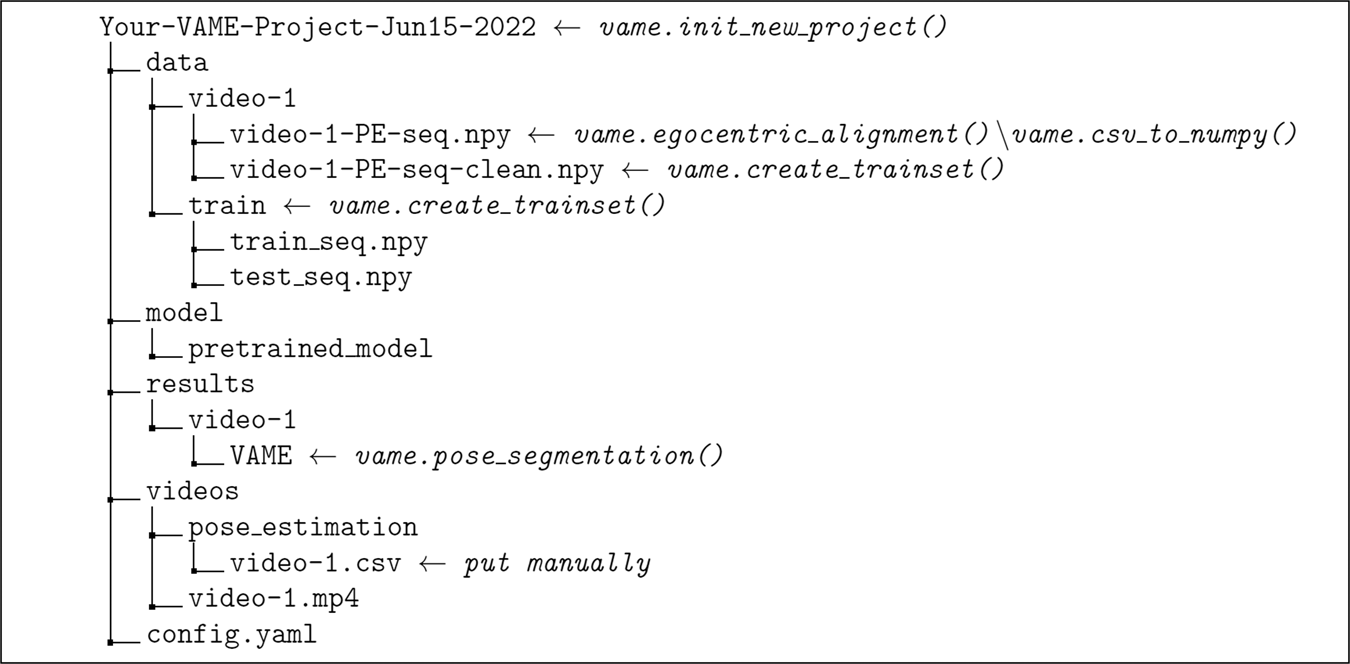


In [ ]:
# Check pose estimation folder for correct files
# Set target folder to new project name
# Set basefolder if needed but may be the same


base_path = '/content/drive/My Drive/Colab Notebooks/VAME/VAME_Example/'
target_folder = 'VAME_Series-Jan16-2024'  # Relative to base_path

import os
def list_files(base_path, target_folder):
    # Full path to the target folder
    full_target_path = os.path.join(base_path, target_folder)

    for root, dirs, files in os.walk(full_target_path):
        # Calculate the relative depth from the target folder
        depth = root.replace(full_target_path, '').count(os.sep)
        indent = ' ' * 4 * depth
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (depth + 1)
        for f in files:
            print(f'{subindent}{f}')

# Replace with your Google Drive folder path


list_files(base_path, target_folder)

VAME_Series-Jan16-2024/
    config.yaml
    videos/
        video-1.mp4
        pose_estimation/
            video-1.csv
    model/
        pretrained_model/
    data/
        video-1/
            video-1-PE-seq.npy
    results/
        video-1/


In [ ]:
vame.egocentric_alignment(config, pose_ref_index=[0,5], crop_size=(300,300), use_video=False, video_format='.mp4', check_video=False) # transform for egocentric aligment
#uses path to video specified in the config file video sets


Aligning data video-1, Pose confidence value: 0.99


Align frames: 100%|██████████| 29997/29997 [02:11<00:00, 227.91it/s]


Your data is now ine right format and you can call vame.create_trainset()


In [ ]:
#vame.csv_to_numpy(config, datapath='\\content\\drive\\MyDrive\\Colab Notebooks\\VAME\\VAME_Example\\VAME_Example_120224-Jan12-2024\\videos\\pose_estimation') # If data is already in egocentric aligment or you want it to be ignored

In [ ]:
vame.create_trainset(config)

Creating training dataset...
Using robust setting to eliminate outliers! IQR factor: 4
Creating trainset from the vame.csv_to_numpy() output 
z-scoring of file video-1
IQR value: 1.28, IQR cutoff: 5.13
Lenght of train data: 26998
Lenght of test data: 2999
A training and test set has been created. Next step: vame.train_model()


#Begin model training using colab GPU

###Train the model for the first time until convergence (Epoch max default 500).

1.   Run vame.trainmodel()

*NB (1 video 256 epochs, max 500)*

####Update config and re-run / continue training from previous model.

1.   First, set _pretrained_weights_ in your config.yaml to "true"
2.   Also, plug your current model name into _pretrained_model_.
3.   Set "model_convergence" in your config.yaml to a higher value.
4.   re-run vame.trainmodel()
5.   re-run vame.evaluatemodel()



In [ ]:
vame.train_model(config)

Evaluation and plotting of model

Using CUDA
GPU active: True
GPU used: Tesla T4


Evaluation of VAME model. 

Initialize test data. Datapoints 2999
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.pose_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


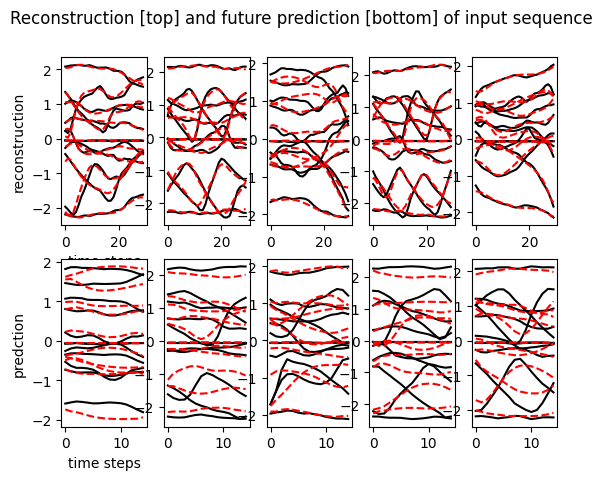

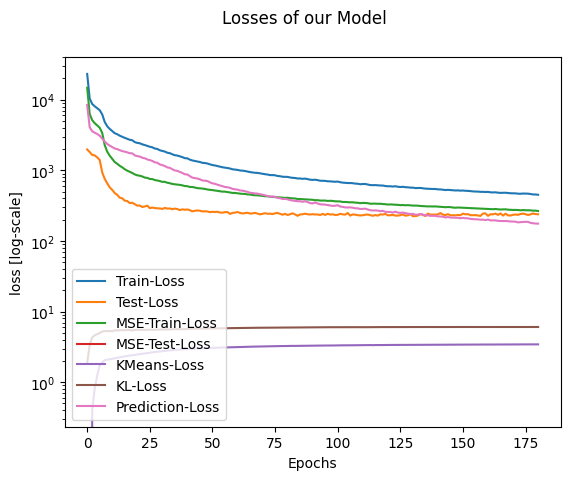

In [ ]:
vame.evaluate_model(config)

#Run Pose_segmentation

NB Works when config file is as below as looks for new folder called VAME inside pose_estimation.
Video folder contains



*   -PE-seq-clean.npy
*   .csv
*  .mp4








*project_path: /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/
VAME_Example_120224-Jan12-2024

*video_sets: [/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan12-2024/videos/pose_estimation/]
or
*video_sets: ['/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan16-2024/videos/']

*n_cluster: 30 (how many k-Means states should be clustered)

*individual_parameterization: False (If True, every animal gets their own parameterization/clustering via k-Means)

In [ ]:
vame.pose_segmentation(config)

Pose segmentation for VAME model: VAME 

Using CUDA
GPU active: True
GPU used: Tesla T4

For model VAME a latent vector embedding already exists. 
Parameterization of latent vector with 15 k-Means cluster
Do you want to continue? A new parameterization will be computed! (yes/no) No
No new parameterization has been calculated.


In [ ]:
vame.motif_videos(config, videoType='.mp4')

Cluster size is: 15 
Motif videos getting created for /content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan16-2024/videos/ ...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan16-2024/videos/VAME/hmm-15/15_km_label_/content/drive/MyDrive/Colab Notebooks/VAME/VAME_Example/VAME_Example_120224-Jan16-2024/videos/.npy'

In [ ]:
vame.community(config, show_umap=False, cut_tree=2)

In [ ]:
vame.community_videos(config)

In [ ]:
vame.visualization(config, label=None) #options: label: None, "motif", "community"

In [ ]:
# Note: This function is currently very slow. Once the frames are saved you can create a video
# or gif via e.g. ImageJ or other tools
vame.gif(config, pose_ref_index=[0,5], subtract_background=True, start=None,
         length=500, max_lag=30, label='community', file_format='.mp4', crop_size=(300,300))

In [ ]:
vame.generative_model(config, mode="centers") #options: mode: "sampling", "reconstruction", "centers", "motifs"